In [1]:
import AR_for_CT as ar
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data = ar.data_preprocessing()

In [28]:
path = data.get_random_path(validation=True)

In [2]:
lmb = []
for k in range(10):
    lmb.append(3**(k-12))
data.find_TV_lambda(lmb)

Lambda: 1.8816764231589208e-06, MSE: 5.39480356022, OriginalError: 7.38911861711


Lambda: 5.645029269476762e-06, MSE: 5.17441783433, OriginalError: 7.38911861711


Lambda: 1.6935087808430286e-05, MSE: 4.69434777577, OriginalError: 7.38911861711


Lambda: 5.080526342529086e-05, MSE: 3.8632681269, OriginalError: 7.38911861711


Lambda: 0.00015241579027587258, MSE: 2.97812008172, OriginalError: 7.38911861711


Lambda: 0.0004572473708276177, MSE: 2.73627292047, OriginalError: 7.38911861711


Lambda: 0.0013717421124828531, MSE: 3.23542375534, OriginalError: 7.38911861711


Lambda: 0.00411522633744856, MSE: 4.23456811697, OriginalError: 7.38911861711


Lambda: 0.012345679012345678, MSE: 5.69597889006, OriginalError: 7.38911861711


Lambda: 0.037037037037037035, MSE: 7.7417591175, OriginalError: 7.38911861711


In [15]:
y, x_true, fbp = data.generate_data(16)
pic = fbp
i = 14
print(pic.shape)
print(np.amin(pic[i,...]))
print(np.amax(pic[i,...]))
print(np.average(pic[i,...]))
dif = x_true[i,...,0] - fbp[i,...,0]
print(np.sum(np.square(dif)))
plt.imshow(pic[i,...,0])

(16, 128, 128, 1)
-0.77424
0.594349
0.0057773
87.2198


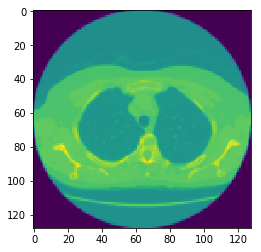

237
0


In [18]:
path = pp.get_random_path()
image = pp.get_pic(path)
plt.figure()
plt.imshow(image)
plt.show()
print(np.amax(image))
print(np.amin(image))

In [13]:
list = pp.find('*.dcm', './Train_Data')
print(len(list))

397


In [15]:
import platform
platform.node()

'LAPTOP-E6AJ1CPF'

In [6]:
import numpy as np
true, cor = denoiser.generate_local_input(128)
recon = np.copy(cor)

78.3352261281


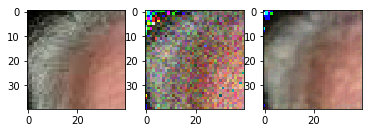

In [ ]:
stepsize = 0.2
steps = 0
print(str(np.linalg.norm(cor - true)))
for k in range(steps):
    gradient = denoiser.sess.run([denoiser.pic_grad], feed_dict={denoiser.inpainted_im: recon,
                                                                     denoiser.corrupted_im: cor})
    recon = recon - stepsize * gradient[0][0]
    # evaluate L2 distance
    print(str(np.linalg.norm(recon - true)))
plt.subplot(131)
plt.imshow(true[0,...])
plt.subplot(132)
plt.imshow(cor[0,...])
plt.subplot(133)
plt.imshow(recon[0,...])
plt.savefig('Saves/Pictures/' + denoiser.model_name + '/example.png')